In [1]:
# load the libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('Downloads/PupilBioTest_PMP_revA.csv')

In [7]:
# data visulization
print(df.head())
print(df.tail())
print(df.describe())

  strand    CpG_Coordinates  `000  `001  `010  `011  `100  `101  `110  `111  \
0      r  10035:10044:10046  1077     9     0     0     0     0     0     4   
1      r  10035:10044:10053  1086     0     0     0     0     0     0     4   
2      r  10035:10044:10058  1069    17     0     0     0     0     0     4   
3      r  10035:10044:10071  1072    14     0     0     0     0     0     4   
4      r  10035:10044:10075  1086     0     0     0     0     0     0     4   

   Sample_ID Replicate Tissue  
0          1      Rep2  cfDNA  
1          1      Rep2  cfDNA  
2          1      Rep2  cfDNA  
3          1      Rep2  cfDNA  
4          1      Rep2  cfDNA  
         strand   CpG_Coordinates  `000  `001  `010  `011  `100  `101  `110  \
15392178      f  9998:10121:10133    76     0     0     0     0     0     0   
15392179      f  9998:10121:10140    47     0     0     0     0     0     0   
15392180      f  9998:10130:10133    76     0     0     0     0     0     0   
15392181      f  

In [11]:
# Assuming single CpG coverage is the sum of counts across all methylation states
#extract the coverage 
df['Coverage'] = df.iloc[:, 2:10].sum(axis=1)
print(df['Coverage'])

0           1090
1           1090
2           1090
3           1090
4           1090
            ... 
15392178      76
15392179      47
15392180      76
15392181      47
15392182      47
Name: Coverage, Length: 15392183, dtype: int64


In [16]:
# Calculate median and CV for each tissue
stats = df.groupby('Tissue')['Coverage'].agg(['median', 'std', 'mean'])
stats['CV'] = tissue_stats['std'] / tissue_stats['mean'] * 100
print(tissue_stats)

        median          std         mean          CV
Tissue                                              
Islet     84.0   167.470211   147.359490  113.647387
cfDNA    484.0  1338.977645  1013.508239  132.113149


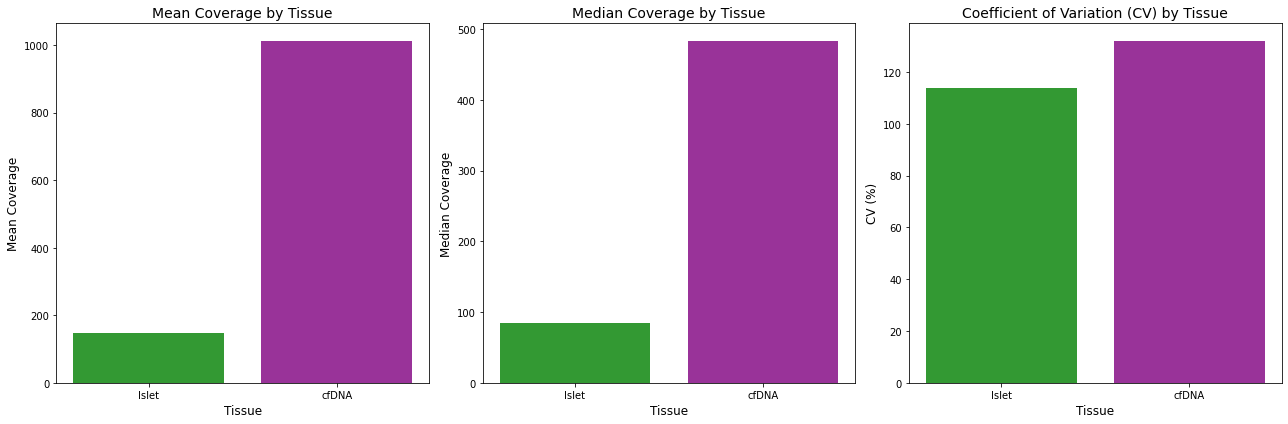

In [29]:
# Plot statistics
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Bar plot for mean coverage
axes[0].bar(stats.index, stats['mean'], color=['green', 'purple'], alpha=0.8)
axes[0].set_title('Mean Coverage by Tissue', fontsize=14)
axes[0].set_ylabel('Mean Coverage', fontsize=12)
axes[0].set_xlabel('Tissue', fontsize=12)

# Bar plot for median coverage
axes[1].bar(stats.index, stats['median'], color=['green', 'purple'], alpha=0.8)
axes[1].set_title('Median Coverage by Tissue', fontsize=14)
axes[1].set_ylabel('Median Coverage', fontsize=12)
axes[1].set_xlabel('Tissue', fontsize=12)

# Bar plot for coefficient of variation (CV)
axes[2].bar(stats.index, stats['CV'], color=['green', 'purple'], alpha=0.8)
axes[2].set_title('Coefficient of Variation (CV) by Tissue', fontsize=14)
axes[2].set_ylabel('CV (%)', fontsize=12)
axes[2].set_xlabel('Tissue', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()